In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
%matplotlib inline

In [3]:
from sklearn.preprocessing import scale

map = {}

xls = pd.ExcelFile('nba_draft.xlsx')
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)

df = [
    map['draft_data_1990'], 
    map['draft_data_1991'], 
    map['draft_data_1992'], 
    map['draft_data_1993'], 
    map['draft_data_1994'], 
    map['draft_data_1995'], 
    map['draft_data_1996'], 
    map['draft_data_1997'], 
    map['draft_data_1998'], 
    map['draft_data_1999'], 
    map['draft_data_2000'], 
    map['draft_data_2001'], 
    map['draft_data_2002'], 
    map['draft_data_2003'], 
    map['draft_data_2004'], 
    map['draft_data_2005'], 
    map['draft_data_2006'], 
    map['draft_data_2007'], 
    map['draft_data_2008'], 
    map['draft_data_2009'], 
    map['draft_data_2010'], 
    map['draft_data_2011'], 
    map['draft_data_2012'], 
    map['draft_data_2013'], 
    map['draft_data_2014'], 
    map['draft_data_2015'], 
    map['draft_data_2016'], 
    map['draft_data_2017'], 
    map['draft_data_2018'], 
    map['draft_data_2019'],
]

In [4]:
color_theme = np.array(['red','blue','green', 'yellow', 'orange'])

# Clustering Analysis (PPG, RPG, APG)

In [5]:
num_clusters = 2
max_draft_selection = 10
positions = ['Point']

df = pd.concat(df)
df = df[df['Pk']  <= max_draft_selection]
df = df[df['position'].isin(positions)]


pg_df_1 = df.iloc[:, 41:-6]
pg_df_1_with_years = df.iloc[:, list(range(41,44)) + [-1]]
data = pg_df_1.to_numpy()
# data = scale(data)
clustering  = KMeans(n_clusters=num_clusters,random_state=5)
clustering.fit(data)
pg_df_1.columns = ['ppg','rpg','apg']

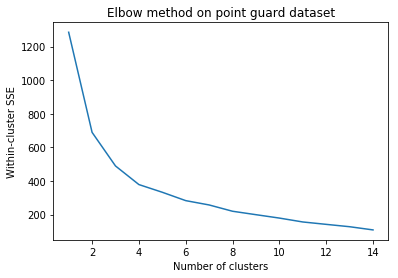

In [6]:
#Elbow method
distortations = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(pg_df_1)
  distortations[k] = kmeans.inertia_

plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on point guard dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

[[14.5325      3.97        5.0525    ]
 [20.74583333  5.0125      4.85416667]]


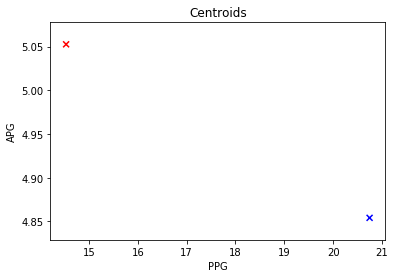

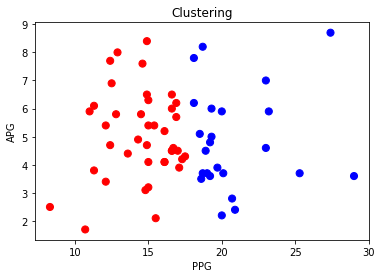

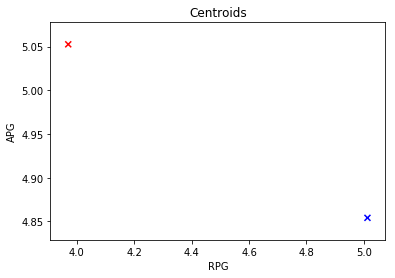

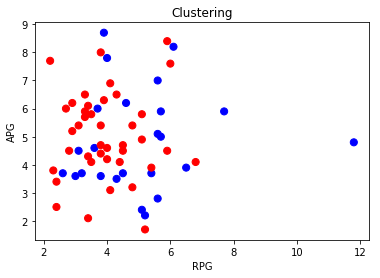

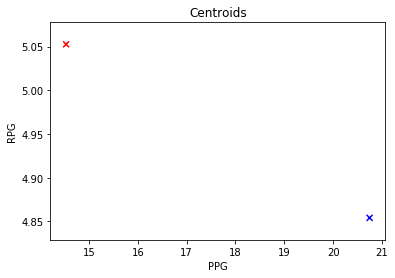

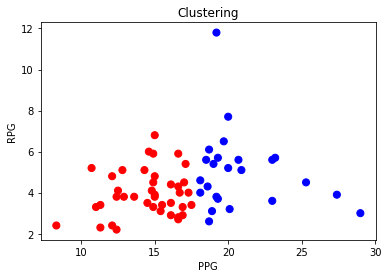

In [7]:
centroids = clustering.cluster_centers_
print(centroids)
t = np.arange(num_clusters)


plt.scatter(centroids[:,0], centroids[:,2], marker="x", c=color_theme[t])
plt.title('Centroids')
plt.xlabel('PPG')
plt.ylabel('APG')
plt.show()

plt.scatter(x=pg_df_1.ppg,y=pg_df_1.apg,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('PPG')
plt.ylabel('APG')
plt.show()

plt.scatter(centroids[:,1], centroids[:,2], marker="x", c=color_theme[t])
plt.title('Centroids')
plt.xlabel('RPG')
plt.ylabel('APG')
plt.show()

plt.scatter(x=pg_df_1.rpg,y=pg_df_1.apg,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('RPG')
plt.ylabel('APG')
plt.show()

plt.scatter(centroids[:,0], centroids[:,2], marker="x", c=color_theme[t])
plt.title('Centroids')
plt.xlabel('PPG')
plt.ylabel('RPG')
plt.show()

plt.scatter(x=pg_df_1.ppg,y=pg_df_1.rpg,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('PPG')
plt.ylabel('RPG')
plt.show()

Text(0.5, 0, 'PPG')

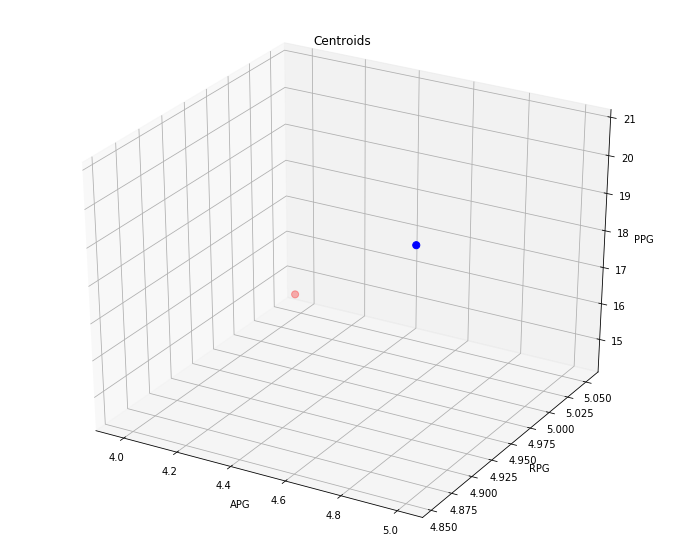

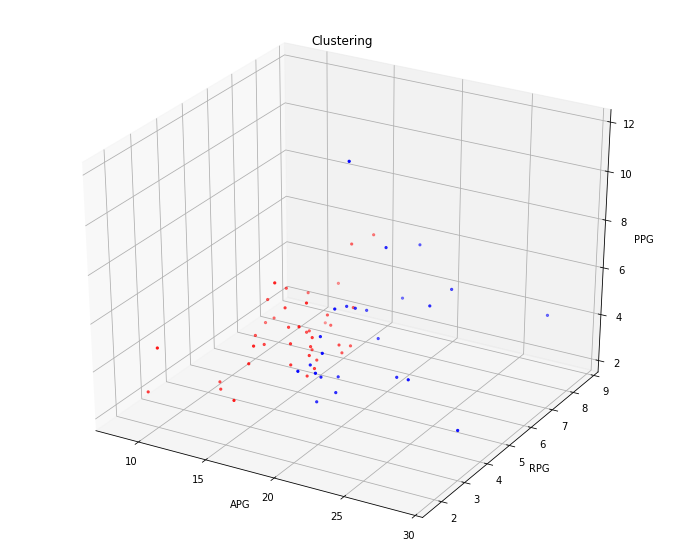

In [8]:
fig = plt.figure(figsize=(12,10))
centroid_3d = fig.add_subplot(111, projection='3d')
centroid_3d.scatter(xs=centroids[:,1],ys=centroids[:,2], zs = centroids[:,0], s=50, c=color_theme[t])
centroid_3d.set_title('Centroids')
centroid_3d.set_xlabel('APG')
centroid_3d.set_ylabel('RPG')
centroid_3d.set_zlabel('PPG')

fig2 = plt.figure(figsize=(12,10))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=pg_df_1.ppg,ys=pg_df_1.apg, zs = pg_df_1.rpg, c=color_theme[clustering.labels_],s=5)
ax.set_title('Clustering')
ax.set_xlabel('APG')
ax.set_ylabel('RPG')
ax.set_zlabel('PPG')

In [9]:
cluster_counts = {}
for i in range(len(clustering.labels_)):
    if clustering.labels_[i] not in cluster_counts:
        cluster_counts[clustering.labels_[i]] = 1
    else:
        cluster_counts[clustering.labels_[i]] += 1
print('In Total:')
for i in cluster_counts:
    print('{} players were drafted in cluster {}'.format(cluster_counts[i], i))
print('\n')
        
decade_counts = {1990: {}, 2000: {}, 2010: {}}
for i in range(num_clusters):  
    decade_counts[1990.0][i] = 0
    decade_counts[2000.0][i] = 0
    decade_counts[2010.0][i] = 0

for i in range(len(clustering.labels_)):
    if (1990.0 <= pg_df_1_with_years.iloc[i][3] < 2000.0):  
        decade_counts[1990][clustering.labels_[i]] += 1
    elif (2000.0 <= pg_df_1_with_years.iloc[i][3] < 2010.0):  
        decade_counts[2000][clustering.labels_[i]] += 1
    elif (2010.0 <= pg_df_1_with_years.iloc[i][3] < 2020.0):  
        decade_counts[2010][clustering.labels_[i]] += 1
    
for i in decade_counts:
    print('In the {}\'s'.format(i))
    for j in decade_counts[i]:
        print('     {} players were drafted in cluster {}'.format(decade_counts[i][j], j))

In Total:
24 players were drafted in cluster 1
40 players were drafted in cluster 0


In the 1990's
     11 players were drafted in cluster 0
     10 players were drafted in cluster 1
In the 2000's
     15 players were drafted in cluster 0
     4 players were drafted in cluster 1
In the 2010's
     14 players were drafted in cluster 0
     10 players were drafted in cluster 1


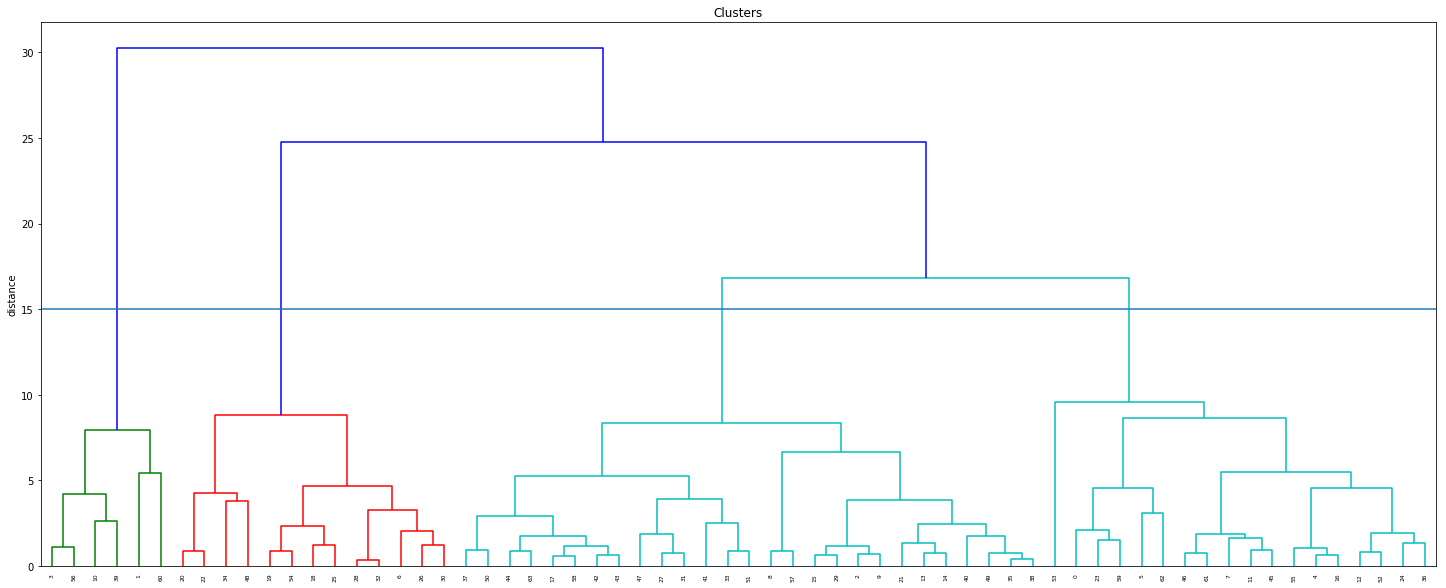

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(pg_df_1,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()

# Clustering Analysis (3 Point Shooting)